In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


In [2]:

class WeatherDataAnalyzer:
    def __init__(self, data_file=None):
        """Initialize the Weather Data Analyzer"""
        self.df = None
        if data_file:
            self.load_data(data_file)
    
    def load_data(self, file_path):
        """Load weather data from CSV file"""
        try:
            self.df = pd.read_csv(file_path)
            print(f"Data loaded successfully! Shape: {self.df.shape}")
            print(f"\nColumns: {list(self.df.columns)}")
            return True
        except Exception as e:
            print(f"Error loading data: {e}")
            return False
    
    def create_sample_data(self, days=365):
        """Create sample weather data for demonstration"""
        dates = pd.date_range(end=datetime.now(), periods=days, freq='D')
        
        # Generate realistic weather data
        temp_base = 20 + 10 * np.sin(np.arange(days) * 2 * np.pi / 365)
        
        self.df = pd.DataFrame({
            'date': dates,
            'temperature': temp_base + np.random.randn(days) * 3,
            'humidity': np.clip(60 + np.random.randn(days) * 15, 20, 100),
            'precipitation': np.maximum(0, np.random.exponential(2, days)),
            'wind_speed': np.maximum(0, np.random.gamma(2, 2, days)),
            'pressure': 1013 + np.random.randn(days) * 10
        })
        
        self.df['date'] = pd.to_datetime(self.df['date'])
        print("Sample data created successfully!")
        return self.df
    
    def summary_statistics(self):
        """Display summary statistics for weather data"""
        if self.df is None:
            print("No data loaded!")
            return
        
        print("\n" + "="*60)
        print("WEATHER DATA SUMMARY STATISTICS")
        print("="*60)
        
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        
        for col in numeric_cols:
            print(f"\n{col.upper()}:")
            print(f"  Mean:     {self.df[col].mean():.2f}")
            print(f"  Median:   {self.df[col].median():.2f}")
            print(f"  Std Dev:  {self.df[col].std():.2f}")
            print(f"  Min:      {self.df[col].min():.2f}")
            print(f"  Max:      {self.df[col].max():.2f}")
    
    def plot_temperature_trend(self):
        """Plot temperature trends over time"""
        if self.df is None:
            print("No data loaded!")
            return
        
        plt.figure(figsize=(12, 6))
        plt.plot(self.df['date'], self.df['temperature'], linewidth=1, alpha=0.7)
        plt.title('Temperature Trend Over Time', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Temperature (°C)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def plot_correlation_heatmap(self):
        """Plot correlation heatmap of weather variables"""
        if self.df is None:
            print("No data loaded!")
            return
        
        numeric_df = self.df.select_dtypes(include=[np.number])
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', 
                    cmap='coolwarm', center=0, square=True,
                    linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Weather Variables Correlation Heatmap', 
                  fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def plot_monthly_averages(self):
        """Plot monthly average temperatures"""
        if self.df is None or 'date' not in self.df.columns:
            print("No data loaded or date column missing!")
            return
        
        df_copy = self.df.copy()
        df_copy['month'] = pd.to_datetime(df_copy['date']).dt.month
        monthly_avg = df_copy.groupby('month')['temperature'].mean()
        
        plt.figure(figsize=(10, 6))
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        plt.bar(range(1, 13), monthly_avg, color='skyblue', edgecolor='navy')
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average Temperature (°C)', fontsize=12)
        plt.title('Monthly Average Temperature', fontsize=16, fontweight='bold')
        plt.xticks(range(1, 13), months)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def plot_all_variables(self):
        """Create subplots for all weather variables"""
        if self.df is None:
            print("No data loaded!")
            return
        
        numeric_cols = [col for col in self.df.columns if col != 'date' 
                       and self.df[col].dtype in [np.float64, np.int64]]
        
        n_cols = len(numeric_cols)
        fig, axes = plt.subplots(n_cols, 1, figsize=(12, 4*n_cols))
        
        if n_cols == 1:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            axes[idx].plot(self.df['date'], self.df[col], linewidth=1)
            axes[idx].set_title(f'{col.title()} Over Time', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Date')
            axes[idx].set_ylabel(col.title())
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def find_extreme_days(self):
        """Find days with extreme weather conditions"""
        if self.df is None:
            print("No data loaded!")
            return
        
        print("\n" + "="*60)
        print("EXTREME WEATHER DAYS")
        print("="*60)
        
        if 'temperature' in self.df.columns:
            hottest = self.df.loc[self.df['temperature'].idxmax()]
            coldest = self.df.loc[self.df['temperature'].idxmin()]
            print(f"\nHottest Day: {hottest['date']} - {hottest['temperature']:.2f}°C")
            print(f"Coldest Day: {coldest['date']} - {coldest['temperature']:.2f}°C")
        
        if 'precipitation' in self.df.columns:
            wettest = self.df.loc[self.df['precipitation'].idxmax()]
            print(f"\nWettest Day: {wettest['date']} - {wettest['precipitation']:.2f}mm")
        
        if 'wind_speed' in self.df.columns:
            windiest = self.df.loc[self.df['wind_speed'].idxmax()]
            print(f"\nWindiest Day: {windiest['date']} - {windiest['wind_speed']:.2f} km/h")



In [4]:

# Example usage
'''if __name__ == "__main__":
    # Create analyzer instance
    analyzer = WeatherDataAnalyzer()
    
    # Create sample data (or load from file with: analyzer.load_data('weather.csv'))
    analyzer.create_sample_data(days=365)
    
    # Display summary statistics
    analyzer.summary_statistics()
    
    # Find extreme weather days
    analyzer.find_extreme_days()
    
    # Create visualizations
    print("\nGenerating visualizations...")
    analyzer.plot_temperature_trend()
    analyzer.plot_monthly_averages()
    analyzer.plot_correlation_heatmap()
    analyzer.plot_all_variables()
    
    print("\nAnalysis complete!")
'''


'if __name__ == "__main__":\n    # Create analyzer instance\n    analyzer = WeatherDataAnalyzer()\n\n    # Create sample data (or load from file with: analyzer.load_data(\'weather.csv\'))\n    analyzer.create_sample_data(days=365)\n\n    # Display summary statistics\n    analyzer.summary_statistics()\n\n    # Find extreme weather days\n    analyzer.find_extreme_days()\n\n    # Create visualizations\n    print("\nGenerating visualizations...")\n    analyzer.plot_temperature_trend()\n    analyzer.plot_monthly_averages()\n    analyzer.plot_correlation_heatmap()\n    analyzer.plot_all_variables()\n\n    print("\nAnalysis complete!")\n'

In [5]:
# Create analyzer instance
analyzer = WeatherDataAnalyzer()
# Create sample data (or load from file with: analyzer.load_data('weather.csv'))
analyzer.create_sample_data(days=365)

Sample data created successfully!


,date,temperature,humidity,precipitation,wind_speed,pressure
0,2024-10-29 13:31:23.042912,21.009953,58.879614,0.443522,8.174858,992.294683
1,2024-10-30 13:31:23.042912,25.118485,20.624913,0.813494,3.323827,1011.057090
2,2024-10-31 13:31:23.042912,22.810812,62.960416,0.453973,12.656416,1011.990193
3,2024-11-01 13:31:23.042912,20.749911,69.549343,1.524861,5.660215,1006.991508
4,2024-11-02 13:31:23.042912,23.581164,65.749722,1.255875,2.204010,1022.472148
...,...,...,...,...,...,...
360,2025-10-24 13:31:23.042912,16.949782,63.574309,0.820522,3.077037,1005.211375
361,2025-10-25 13:31:23.042912,20.493008,60.693622,0.978725,5.371664,994.493379
362,2025-10-26 13:31:23.042912,22.593203,64.774603,3.537740,1.610794,1001.338022
363,2025-10-27 13:31:23.042912,21.302298,41.177569,1.290932,4.062109,1010.308688


In [6]:
# Display summary statistics
analyzer.summary_statistics()


WEATHER DATA SUMMARY STATISTICS

TEMPERATURE:
  Mean:     19.82
  Median:   20.14
  Std Dev:  7.61
  Min:      2.89
  Max:      36.43

HUMIDITY:
  Mean:     58.38
  Median:   58.57
  Std Dev:  14.62
  Min:      20.00
  Max:      95.57

PRECIPITATION:
  Mean:     1.94
  Median:   1.26
  Std Dev:  2.01
  Min:      0.01
  Max:      15.67

WIND_SPEED:
  Mean:     4.09
  Median:   3.41
  Std Dev:  3.01
  Min:      0.06
  Max:      15.21

PRESSURE:
  Mean:     1012.63
  Median:   1011.59
  Std Dev:  10.76
  Min:      988.07
  Max:      1046.77


In [7]:
# Find extreme weather days
analyzer.find_extreme_days()


EXTREME WEATHER DAYS

Hottest Day: 2025-01-07 13:31:23.042912 - 36.43°C
Coldest Day: 2025-07-25 13:31:23.042912 - 2.89°C

Wettest Day: 2025-09-06 13:31:23.042912 - 15.67mm

Windiest Day: 2025-03-20 13:31:23.042912 - 15.21 km/h



Generating visualizations...


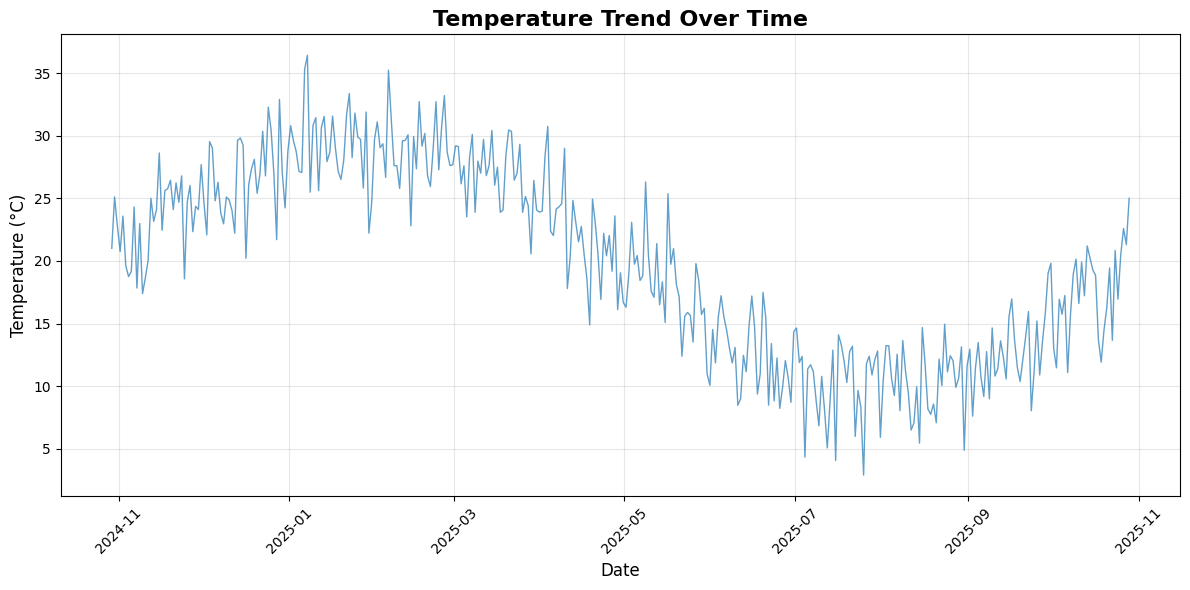

In [8]:
# Create visualizations
print("\nGenerating visualizations...")
analyzer.plot_temperature_trend()

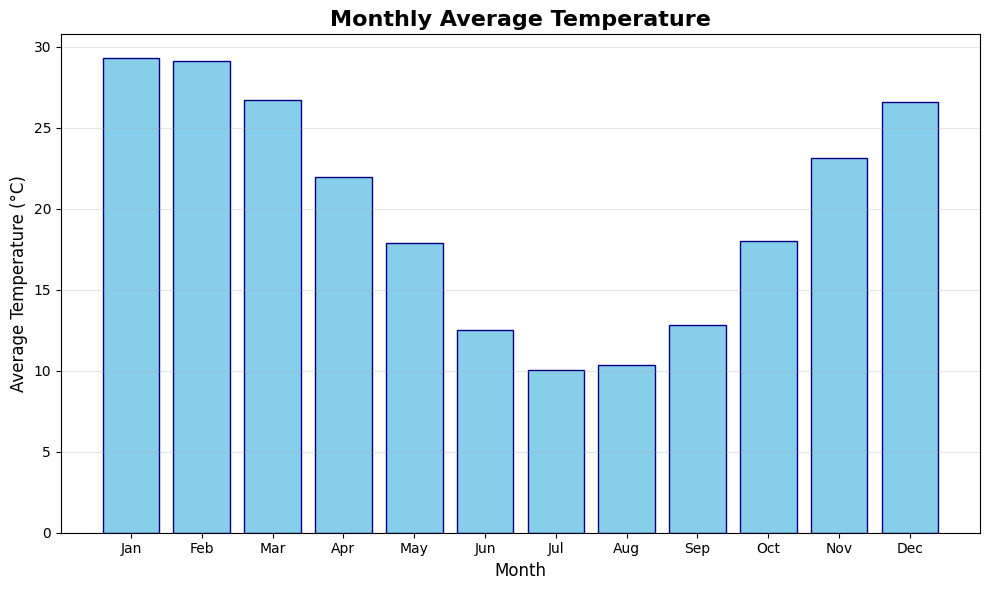

In [9]:
analyzer.plot_monthly_averages()

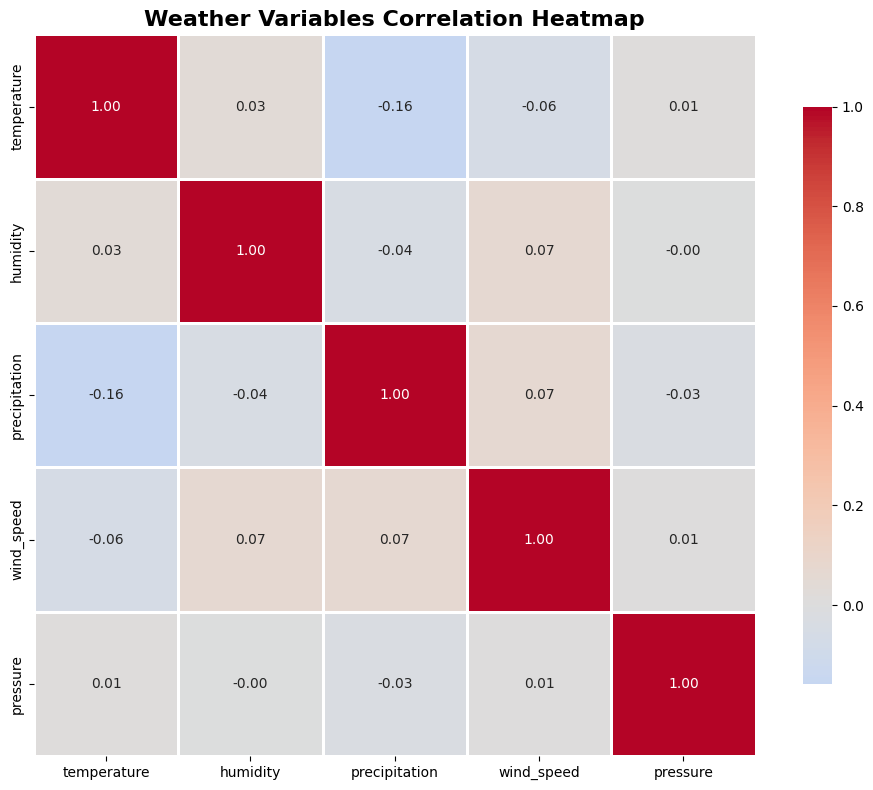

In [10]:
analyzer.plot_correlation_heatmap()

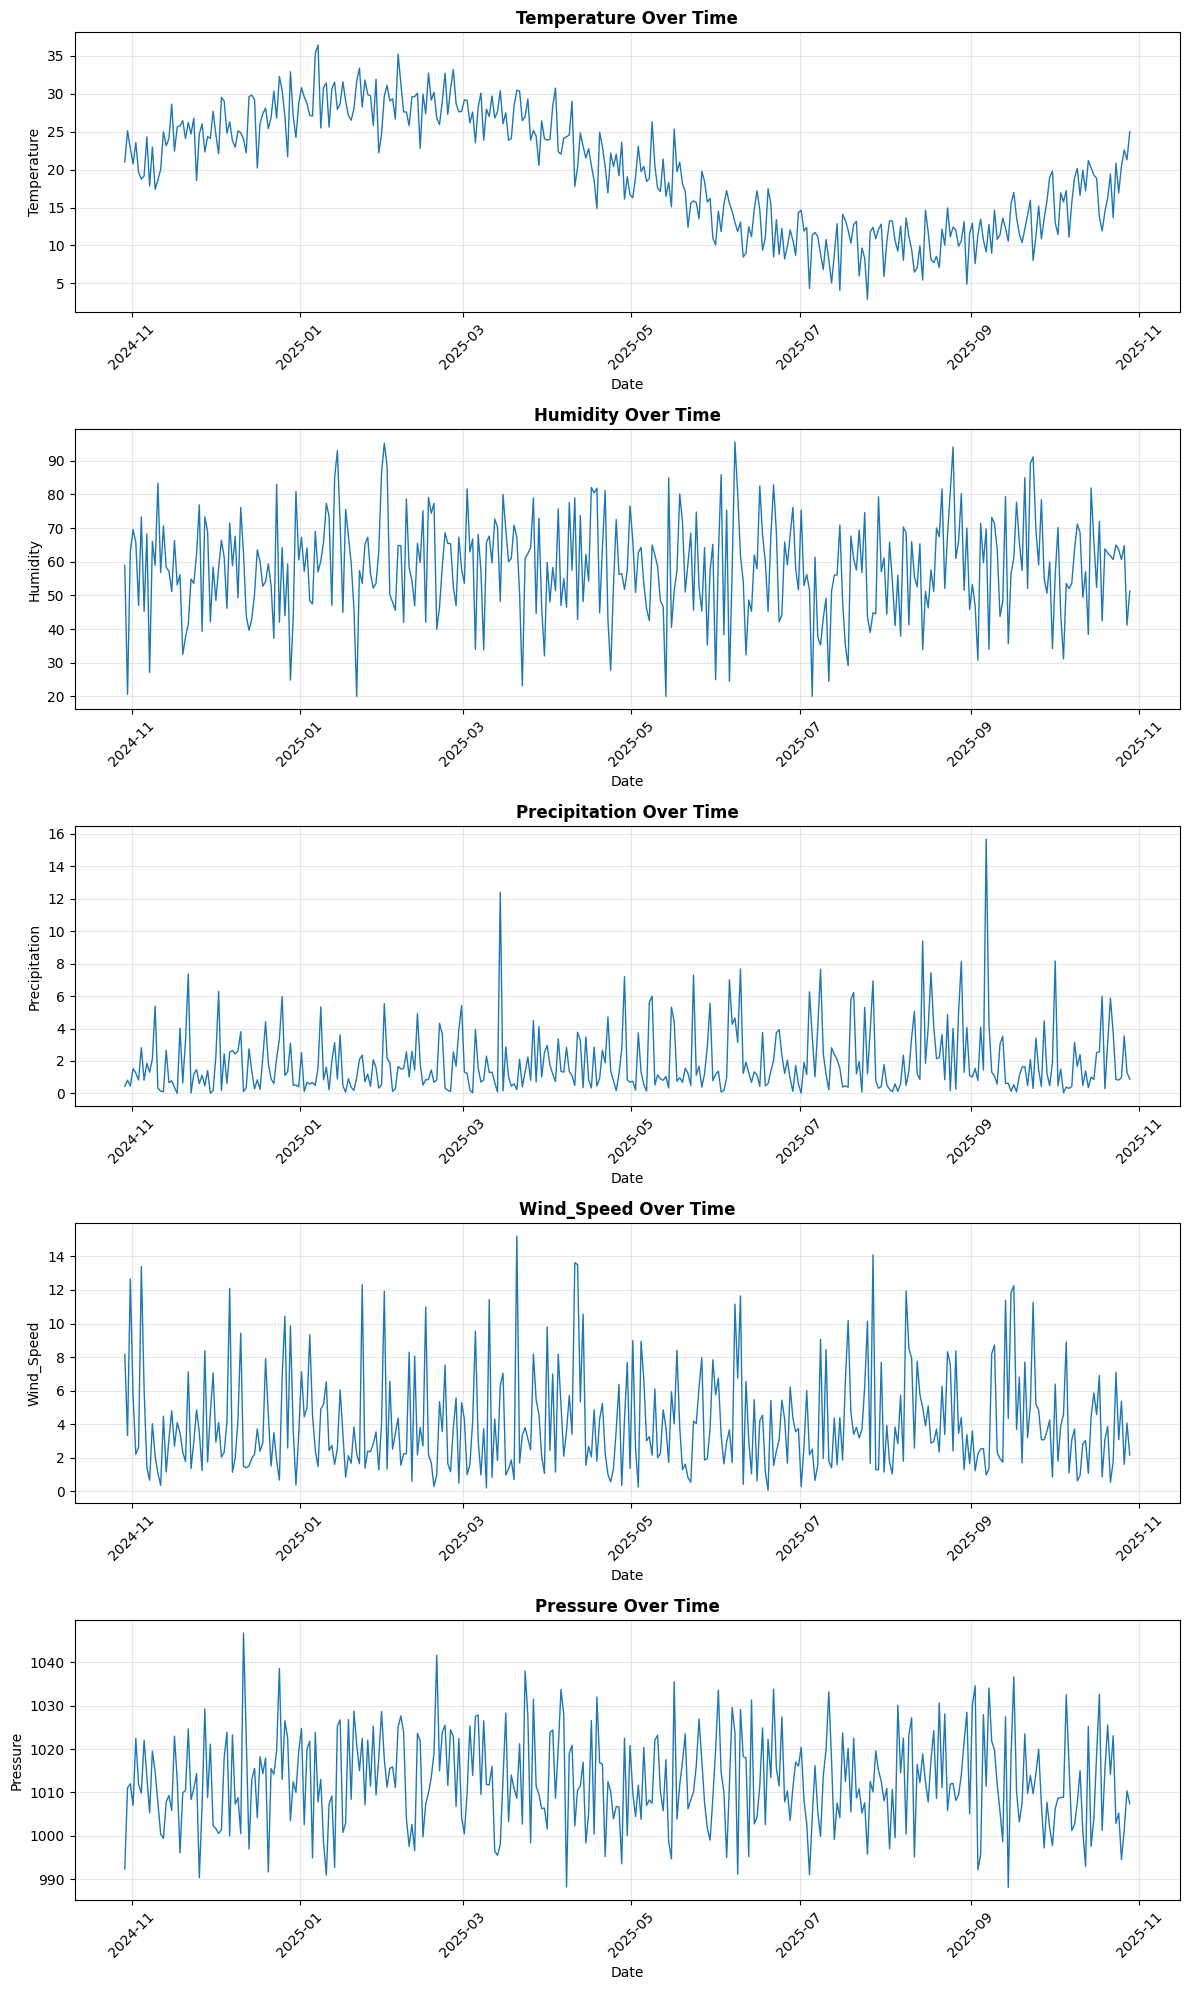


Analysis complete!


In [11]:
analyzer.plot_all_variables()
    
print("\nAnalysis complete!")